# Chapter 10 Introduction to Artificial Neural Networks with Keras

In [1]:
import sys

sys.version_info

sys.version_info(major=3, minor=11, micro=5, releaselevel='final', serial=0)

## Imports 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy, MeanSquaredError
from tensorflow.keras.layers import Dense

In [3]:
plt.rc("font", size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc("legend", fontsize=14)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

## From Biological to Artificial Neuron

In [4]:
from sklearn.linear_model import Perceptron
from sklearn.datasets import load_iris

In [5]:
iris = load_iris(as_frame=True).frame

In [6]:
X = iris.drop("target", axis=1)
y = iris.target == 0   # Iris Setosa

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [8]:
per_clf = Perceptron(random_state=42, )
per_clf.fit(X_train, y_train)

Perceptron(random_state=42)

In [9]:
accuracy_score(per_clf.predict(X_test), y_test)

1.0

The Perceptron is equivalent to a SGDClassifier with loss="perceptron", no regularization, and a constant learning rate equal to 1:

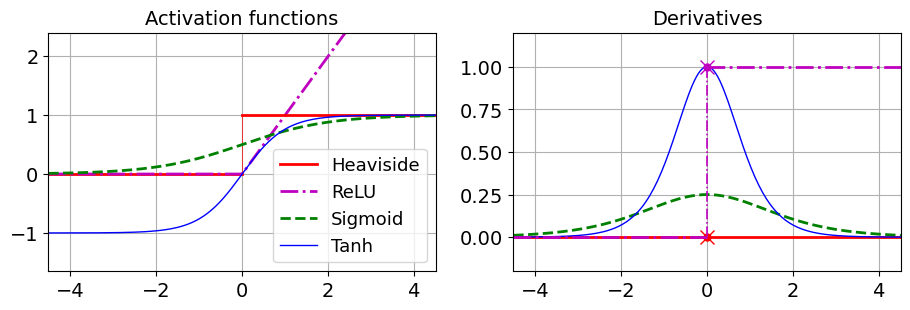

In [10]:
from scipy.special import expit as sigmoid

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])
plt.show()

## Regression MLP's

In [6]:
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [12]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, random_state=42, test_size=0.5)

In [14]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(
    StandardScaler(),
    mlp_reg
)

In [15]:
pipeline.fit(X_train, y_train)

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpregressor',
                 MLPRegressor(hidden_layer_sizes=[50, 50, 50],
                              random_state=42))])

In [16]:
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

In [17]:
rmse

0.4986214747787897

In [18]:
print(y_pred.shape)
print(y_valid.shape)

(3096,)
(3096,)


## Classification MLPs

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

In [20]:
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

## Implementing MLPs with Keras

### Building an MLP with Sequential api

In [8]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [22]:
(X_train, y_train), (X_test, y_test) = fashion_mnist

In [40]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

### Plot an image using matplotlib

(-0.5, 27.5, 27.5, -0.5)

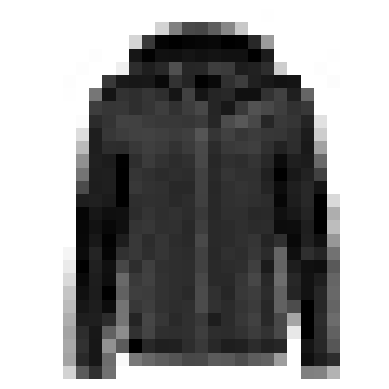

In [25]:
plt.imshow(X_train[5000], cmap="binary")
plt.axis("off")

In [26]:
y_train[5000]

4

In [27]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

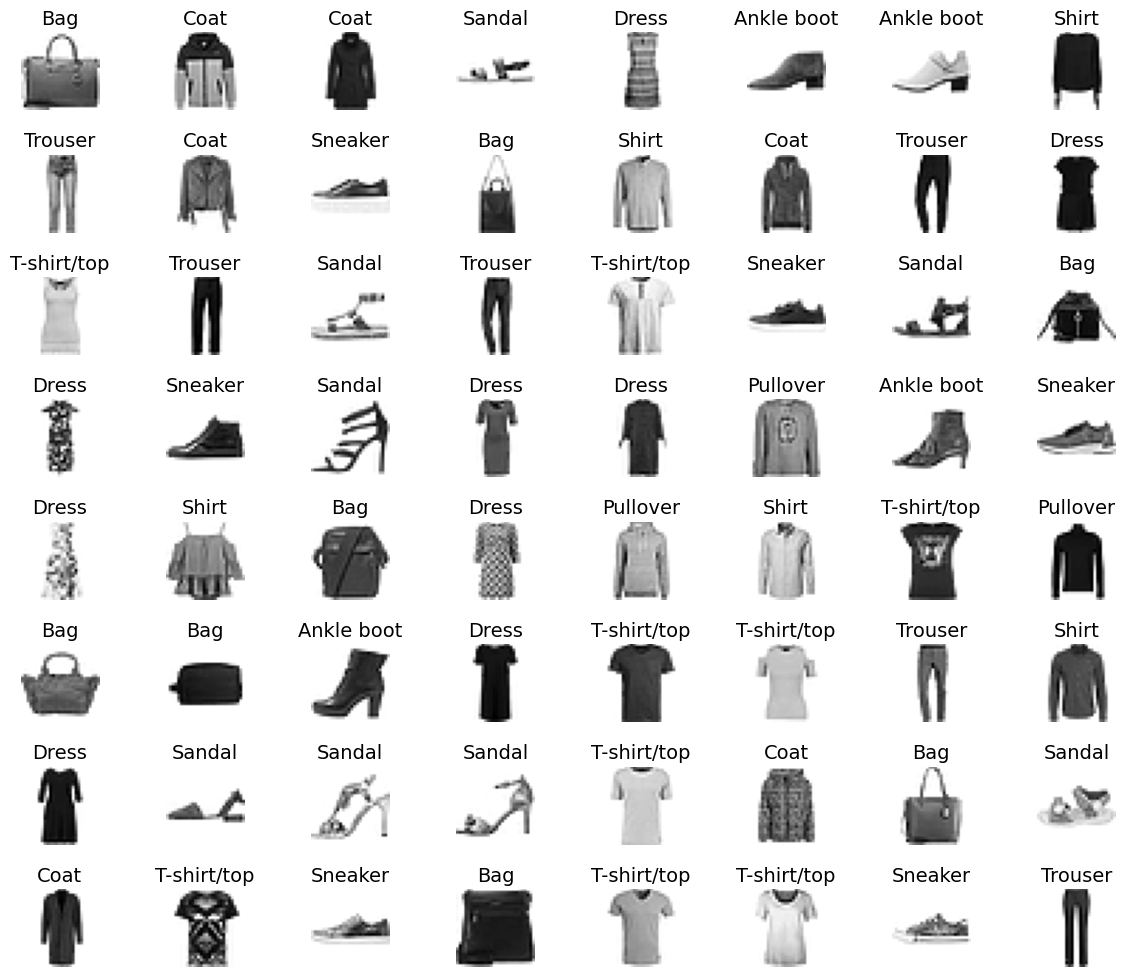

In [28]:
fig, axs = plt.subplots(8, 8, figsize=(12, 10))

for i, ax in enumerate(axs.flatten()):
    rand_int = np.random.randint(0, 55000)
    ax.imshow(X_train[rand_int], cmap="binary")
    ax.axis("off")
    ax.set_title(class_names[y_train[rand_int]])

plt.axis("off")
plt.tight_layout()

## Create a model

In [8]:
tf.random.set_seed(42)

In [32]:
model = Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(Dense(300, "relu"))
model.add(Dense(100, "relu"))
model.add(Dense(10, "softmax"))

In [33]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [34]:
model = Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    Dense(300, "relu"),
    Dense(100, "relu"),
    Dense(10, "softmax")
])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [41]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30)

Epoch 1/30
1712/1719 [============================>.] - ETA: 0s - loss: 7091427737600.0000 - sparse_categorical_accuracy: 0.1000

ValueError: in user code:

    File "C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1917, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\abhis\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(None, 4)


## REgression MLPs

In [25]:
housing = fetch_california_housing()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [44]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [45]:
print(f"The Shape of X_train: {X_train.shape}")
print(f"The Shape of y_train: {y_train.shape}")
print(f"The Shape of X_test: {X_test.shape}")
print(f"The Shape of y_test: {y_test.shape}")

The Shape of X_train: (14448, 8)
The Shape of y_train: (14448,)
The Shape of X_test: (3096, 8)
The Shape of y_test: (3096,)


In [50]:
norm_layer = tf.keras.layers.Normalization()

model = Sequential(
    [
        tf.keras.Input(shape=(8)),
        norm_layer,
        Dense(300, activation="relu"),
        Dense(300, activation="relu"),
        Dense(1, activation="linear"),
    ]
)

In [54]:
model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.keras.optimizers.Adam(0.01)
)

In [55]:
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
452/452 [==============================] - 2s 2ms/step - loss: 0.2880 - val_loss: 0.3054
Epoch 2/20
452/452 [==============================] - 1s 2ms/step - loss: 0.2824 - val_loss: 0.3040
Epoch 3/20
452/452 [==============================] - 1s 2ms/step - loss: 0.2821 - val_loss: 0.3406
Epoch 4/20
452/452 [==============================] - 1s 2ms/step - loss: 0.2774 - val_loss: 0.3114
Epoch 5/20
452/452 [==============================] - 1s 2ms/step - loss: 0.2862 - val_loss: 0.3070
Epoch 6/20
452/452 [==============================] - 1s 2ms/step - loss: 0.2763 - val_loss: 0.2987
Epoch 7/20
452/452 [==============================] - 1s 2ms/step - loss: 0.2750 - val_loss: 0.2994
Epoch 8/20
452/452 [==============================] - 1s 2ms/step - loss: 0.2690 - val_loss: 0.3202
Epoch 9/20
452/452 [==============================] - 1s 2ms/step - loss: 0.2715 - val_loss: 0.3134
Epoch 10/20
452/452 [==============================] - 1s 2ms/step - loss: 0.2759 - val_loss: 0.2934

## Building Complex modle using functional api

In [56]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [57]:
norm_layer = tf.keras.layers.Normalization()
hidden1 = tf.keras.layers.Dense(30, activation="relu")
hidden2 = tf.keras.layers.Dense(30, activation="relu")
concat = tf.keras.layers.Concatenate()
output = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=(X_train.shape[1:]))
norm_layer = norm_layer(input_)
hidden1 = hidden1(norm_layer)
hidden2 = hidden2(hidden1)
concat = concat([norm_layer, hidden2])
output = output(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [58]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 normalization (Normalizati  (None, 8)                    17        ['input_1[0][0]']             
 on)                                                                                              
                                                                                                  
 dense (Dense)               (None, 30)                   270       ['normalization[0][0]']       
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']           

In [60]:
model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3)
)

# norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
452/452 [==============================] - 1s 2ms/step - loss: 24099.2402 - val_loss: 6.8024
Epoch 2/20
452/452 [==============================] - 1s 2ms/step - loss: 9.6339 - val_loss: 1.5906
Epoch 3/20
452/452 [==============================] - 1s 2ms/step - loss: 3.9879 - val_loss: 1.1669
Epoch 4/20
452/452 [==============================] - 1s 2ms/step - loss: 1.5118 - val_loss: 0.9697
Epoch 5/20
452/452 [==============================] - 1s 2ms/step - loss: 1.0893 - val_loss: 0.9106
Epoch 6/20
452/452 [==============================] - 1s 2ms/step - loss: 0.9674 - val_loss: 2.5064
Epoch 7/20
452/452 [==============================] - 1s 2ms/step - loss: 0.9780 - val_loss: 0.8284
Epoch 8/20
452/452 [==============================] - 1s 2ms/step - loss: 1.0895 - val_loss: 1.4048
Epoch 9/20
452/452 [==============================] - 1s 2ms/step - loss: 2.2714 - val_loss: 0.8349
Epoch 10/20
452/452 [==============================] - 1s 2ms/step - loss: 1.2644 - val_loss: 0.

In [61]:
model.evaluate(X_test, y_test)

97/97 [==============================] - 0s 1ms/step - loss: 0.8013


0.8013407588005066

## Using wide and Deep networks

In [27]:
input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20


452/452 [==============================] - 1s 1ms/step - loss: 1.6379 - root_mean_squared_error: 1.2798 - val_loss: 0.6934 - val_root_mean_squared_error: 0.8327
Epoch 2/20
452/452 [==============================] - 1s 1ms/step - loss: 0.5970 - root_mean_squared_error: 0.7727 - val_loss: 0.5212 - val_root_mean_squared_error: 0.7220
Epoch 3/20
452/452 [==============================] - 1s 1ms/step - loss: 0.4898 - root_mean_squared_error: 0.6999 - val_loss: 0.4587 - val_root_mean_squared_error: 0.6772
Epoch 4/20
452/452 [==============================] - 1s 1ms/step - loss: 0.4338 - root_mean_squared_error: 0.6587 - val_loss: 0.4213 - val_root_mean_squared_error: 0.6491
Epoch 5/20
452/452 [==============================] - 1s 1ms/step - loss: 0.3940 - root_mean_squared_error: 0.6277 - val_loss: 0.3968 - val_root_mean_squared_error: 0.6299
Epoch 6/20
452/452 [==============================] - 1s 1ms/step - loss: 0.3749 - root_mean_squared_error: 0.6123 - val_loss: 0.3868 - va

## Saving and Restoring the model

In [9]:
# delete the directory in case if it already existed

import shutil

# shutil.rmtree("my_keras_model", ignore_errors=True)

In [31]:
model.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model\assets


INFO:tensorflow:Assets written to: my_keras_model\assets


In [10]:
from pathlib import Path

In [36]:
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

my_keras_model\assets
my_keras_model\fingerprint.pb
my_keras_model\keras_metadata.pb
my_keras_model\saved_model.pb
my_keras_model\variables
my_keras_model\variables\variables.data-00000-of-00001
my_keras_model\variables\variables.index


In [37]:
model = tf.keras.models.load_model("my_keras_model")

In [40]:
y_pred = model.predict((X_test_wide, X_test_deep))

97/97 [==============================] - 0s 865us/step


In [44]:
model.evaluate((X_test_wide, X_test_deep), y_test)

97/97 [==============================] - 0s 940us/step - loss: 0.3057 - root_mean_squared_error: 0.5529


[0.3056604862213135, 0.5528656840324402]

## Using Callbacks

In [46]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model.fit((X_train_wide, X_train_deep), y_train, validation_data=((X_valid_wide, X_valid_deep), y_valid), epochs=50, callbacks=[early_stopping_cb])

Epoch 1/50
452/452 [==============================] - 1s 1ms/step - loss: 0.2909 - root_mean_squared_error: 0.5394 - val_loss: 0.3130 - val_root_mean_squared_error: 0.5595
Epoch 2/50
452/452 [==============================] - 1s 1ms/step - loss: 0.2916 - root_mean_squared_error: 0.5400 - val_loss: 0.3145 - val_root_mean_squared_error: 0.5608
Epoch 3/50
452/452 [==============================] - 1s 1ms/step - loss: 0.2946 - root_mean_squared_error: 0.5428 - val_loss: 0.3124 - val_root_mean_squared_error: 0.5589
Epoch 4/50
452/452 [==============================] - 1s 1ms/step - loss: 0.2917 - root_mean_squared_error: 0.5401 - val_loss: 0.3242 - val_root_mean_squared_error: 0.5694
Epoch 5/50
452/452 [==============================] - 1s 1ms/step - loss: 0.2908 - root_mean_squared_error: 0.5392 - val_loss: 0.3111 - val_root_mean_squared_error: 0.5577
Epoch 6/50
452/452 [==============================] - 1s 1ms/step - loss: 0.2904 - root_mean_squared_error: 0.5389 - val_loss: 0.3145 - val_

## Using Tensorboard for visulazation

In [47]:
shutil.rmtree("rmtree", ignore_errors=True)

In [48]:
from pathlib import Path
from time import strftime

In [49]:
def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

In [55]:
run_logdir = get_run_logdir()

In [53]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

model = Sequential(
    [
        norm_layer,
        Dense(300, activation='relu'),
        Dense(100, activation="relu"),
        Dense(1)
    ]
)

model.compile(
    loss=tf.keras.losses.mean_squared_error,
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [54]:
norm_layer.adapt(X_train)

In [56]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    run_logdir,
    profile_batch=(100, 200)
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=50,
    callbacks=[early_stopping_cb, tensorboard_cb]
)

Epoch 1/50
452/452 [==============================] - 1s 2ms/step - loss: 0.6107 - root_mean_squared_error: 0.7815 - val_loss: 0.3886 - val_root_mean_squared_error: 0.6234
Epoch 2/50
452/452 [==============================] - 1s 1ms/step - loss: 0.4136 - root_mean_squared_error: 0.6432 - val_loss: 0.3650 - val_root_mean_squared_error: 0.6042
Epoch 3/50
452/452 [==============================] - 1s 1ms/step - loss: 0.3843 - root_mean_squared_error: 0.6199 - val_loss: 0.3566 - val_root_mean_squared_error: 0.5972
Epoch 4/50
452/452 [==============================] - 1s 1ms/step - loss: 0.3499 - root_mean_squared_error: 0.5915 - val_loss: 0.3422 - val_root_mean_squared_error: 0.5850
Epoch 5/50
452/452 [==============================] - 1s 1ms/step - loss: 0.3373 - root_mean_squared_error: 0.5808 - val_loss: 0.3764 - val_root_mean_squared_error: 0.6135
Epoch 6/50
452/452 [==============================] - 1s 1ms/step - loss: 0.3277 - root_mean_squared_error: 0.5725 - val_loss: 0.3284 - val_

In [57]:
print("my_logs")
for path in sorted(Path("my_logs").glob("**/*")):
    print("  " * (len(path.parts) - 1) + path.parts[-1])

my_logs
  run_2024_04_06_12_46_36
    plugins
      profile
        2024_04_06_07_18_40
          AABIS_LAPTOP.xplane.pb
    train
      events.out.tfevents.1712387919.AABIS_LAPTOP.21248.0.v2
    validation
      events.out.tfevents.1712387920.AABIS_LAPTOP.21248.1.v2


In [58]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

In [59]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)

        data = (np.random.randn(100) + 2) * step / 100  # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)

        images = np.random.rand(2, 32, 32, 3) * step / 1000  # gets brighter
        tf.summary.image("my_images", images, step=step)

        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)

        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

In [61]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 21184), started 0:12:34 ago. (Use '!kill 21184' to kill it.)

In [62]:
from tensorboard import notebook

notebook.list()

Known TensorBoard instances:
  - port 6006: logdir ./my_logs (started 0:16:50 ago; pid 21184)


In [63]:
!taskkill /F /PID 21184

SUCCESS: The process with PID 21184 has been terminated.


## Fine Tuning Neural Network Hyperparameters

In [64]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [65]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [68]:
# %pip install keras_tuner
import keras_tuner as kt

In [69]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [70]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 24s]
val_accuracy: 0.8343999981880188

Best val_accuracy So Far: 0.8654000163078308
Total elapsed time: 00h 02m 05s


In [71]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [72]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values 

{'n_hidden': 8,
 'n_neurons': 37,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

In [73]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 37
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8654000163078308


In [74]:
best_model.fit(X_train_full, y_train_full, epochs=30)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3630 - accuracy: 0.8684
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3530 - accuracy: 0.8726
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3445 - accuracy: 0.8738
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3418 - accuracy: 0.8753
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3371 - accuracy: 0.8775
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3303 - accuracy: 0.8783
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3246 - accuracy: 0.8801
Epoch 8/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3235 - accuracy: 0.8805
Epoch 9/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3153 - accuracy: 0.8834
Epoch 10/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.311

In [77]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [78]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [79]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 50 Complete [00h 00m 30s]
val_accuracy: 0.8661999702453613

Best val_accuracy So Far: 0.870199978351593
Total elapsed time: 00h 08m 54s

Search: Running Trial #51

Value             |Best Value So Far |Hyperparameter
2                 |7                 |n_hidden
203               |100               |n_neurons
0.00046153        |0.00044489        |learning_rate
sgd               |adam              |optimizer
True              |False             |normalize
4                 |10                |tuner/epochs
0                 |4                 |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/4
   1/1719 [..............................] - ETA: 9:38 - loss: 125.4693 - accuracy: 0.0625WARNING:tensorflow:Callback method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0013s vs `on_train_batch_end` time: 0.0021s). Check your callbacks.


1719/1719 [==============================] - 4s 2ms/step - loss: 1.9992 - accuracy: 0.7094 - val_loss: 0.8015 - val_accuracy: 0.7510
Epoch 2/4
1117/1719 [==================>...........] - ETA: 1s - loss: 0.7170 - accuracy: 0.7776

KeyboardInterrupt: 

In [80]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 3 Complete [00h 00m 27s]
val_accuracy: 0.8267999887466431

Best val_accuracy So Far: 0.8568000197410583
Total elapsed time: 00h 01m 17s

Search: Running Trial #4

Value             |Best Value So Far |Hyperparameter
8                 |7                 |n_hidden
26                |100               |n_neurons
0.0014505         |0.0012483         |learning_rate
sgd               |sgd               |optimizer
False             |False             |normalize

Epoch 1/10
1719/1719 [==============================] - 3s 1ms/step - loss: 0.9888 - accuracy: 0.6533 - val_loss: 0.7213 - val_accuracy: 0.7426
Epoch 2/10
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6349 - accuracy: 0.7682 - val_loss: 0.5719 - val_accuracy: 0.7914
Epoch 3/10
 752/1719 [============>.................] - ETA: 1s - loss: 0.5812 - accuracy: 0.7915

KeyboardInterrupt: 

In [11]:
# %load_ext tensorboard
# %tensorboard --logdir {root_logdir}

In [12]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() 

11490434/11490434 [==============================] - 8s 1us/step


In [13]:
X_valid, X_train, y_valid, y_train = X_train[:5000], X_train[5000:], y_train[:5000], y_train[5000:]

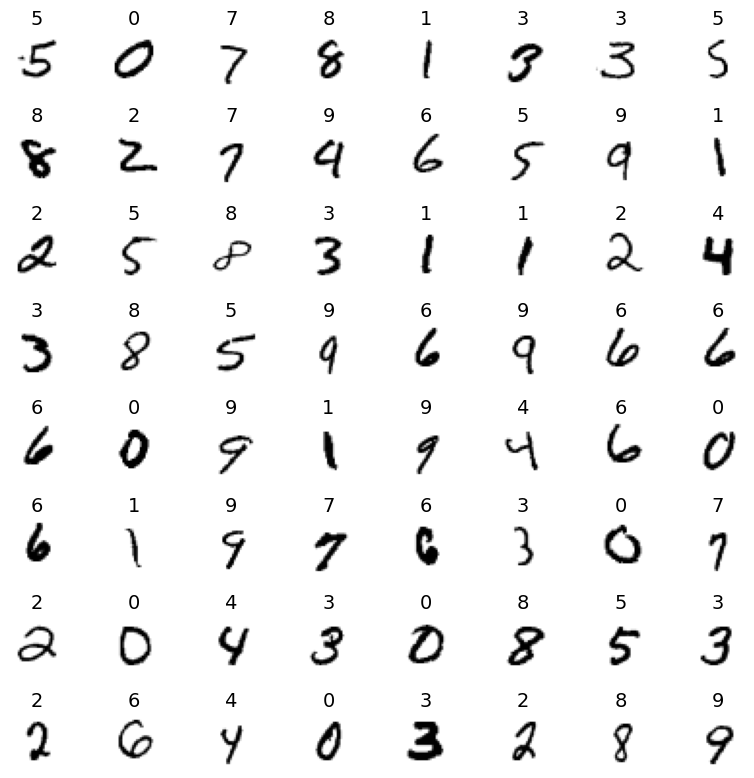

In [27]:
fig, axs = plt.subplots(8, 8, figsize=(8, 8))

for ax in axs.flatten():
    rand_int = np.random.randint(0, 55000)
    ax.imshow(X_train[rand_int], cmap="binary")
    ax.axis("off")
    ax.set_title(y_train[rand_int])

plt.axis("off")
plt.tight_layout()

## Create a baseline model

In [87]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [88]:
model = Sequential(
    [
        tf.keras.layers.Flatten(),
        # Dense(500, activation="relu", kernel_regularizer=tf.keras.regularizers.L2(0.003)),
        Dense(400, activation="relu"),
        Dense(300, activation="relu"),
        Dense(100, activation="relu"),
        Dense(50, activation="relu"),
        Dense(10, activation="softmax")
    ]
)

In [89]:
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

WindowsPath('my_mnist_logs/run_001')

In [90]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir)

model.compile(
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.003),
    metrics=["accuracy"]
)

In [91]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30,
    callbacks=[early_stopping_cb, tensorboard_cb])

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7139 - accuracy: 0.8786 - val_loss: 0.2284 - val_accuracy: 0.9394
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2308 - accuracy: 0.9394 - val_loss: 0.2497 - val_accuracy: 0.9348
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2150 - accuracy: 0.9479 - val_loss: 0.1770 - val_accuracy: 0.9552
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1979 - accuracy: 0.9523 - val_loss: 0.2252 - val_accuracy: 0.9510
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2309 - accuracy: 0.9402 - val_loss: 0.2643 - val_accuracy: 0.9472
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1844 - accuracy: 0.9577 - val_loss: 0.1481 - val_accuracy: 0.9678
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1593 - accuracy: 0.9638 - val_loss: 0.3916 - val_accuracy:

In [93]:
# model = tf.keras.models.load_model("my_mnist_checkpoint") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.1795 - accuracy: 0.9609


[0.179451584815979, 0.9609000086784363]